# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Basic inspection of the data

Let's start by loading the previously transformed and merged data.

In [6]:
# df = pd.read_csv('../data/transformed/transformed_dataset.csv', sep=',', decimal='.', dtype = {'Hour': int}, encoding='utf-8')
df = pd.read_parquet('../data/transformed/transformed_dataset.parquet', engine = 'pyarrow')

# Converting the dates to datetime format
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [7]:
print('The sape of the dataframe is:', df.shape)

print('Description of the numerical variables:')
df.describe()

print('Showing the first 5 individuals:')
df.head(5)

print('The data types are the following ones:')
df.dtypes

The sape of the dataframe is: (8760, 61)
Description of the numerical variables:


Date         Hour       UK_B19       NE_B18  \
count                 8760  8760.000000  3234.000000  8760.000000   
mean   2022-07-02 00:00:00    11.500000  1598.923624  3634.310731   
min    2022-01-01 00:00:00     0.000000     0.000000     0.000000   
25%    2022-04-02 00:00:00     5.750000   517.500000  1065.000000   
50%    2022-07-02 00:00:00    11.500000  1574.500000  2745.500000   
75%    2022-10-01 00:00:00    17.250000  2534.375000  6161.500000   
max    2022-12-31 00:00:00    23.000000  4132.000000  9675.000000   
std                    NaN     6.922582  1101.673890  2940.894576   

             SP_B16  NE_B11       NE_B01       DK_B16       PO_B12  \
count   8760.000000  8760.0  8760.000000  8759.000000  8759.000000   
mean   14196.162158     0.0    72.588927   964.002569    40.949880   
min        0.000000     0.0     0.000000     0.000000     0.000000   
25%      216.000000     0.0    60.000000     0.000000     0.000000   
50%     2692.000000     0.0    64.000000    61.500000     0.000000   
75%    28454.000000     0.0    84.000000  1471.750000    56.000000   
max    57224.500000     0.0   180.000000  7014.500000   232.000000   
std    17548.409066     0.0    42.434867  1497.482264    72.041801   

            HU_B12  ...       HU_B16        IT_Load       DK_Load  \
count  8687.000000  ...  8760.000000    8759.000000   8759.000000   
mean     34.454127  ...  1406.670205  130710.627526  15675.906953   
min       0.000000  ...     0.000000   66436.000000   9068.500000   
25%      20.000000  ...     0.000000  106527.000000  13575.250000   
50%      32.000000  ...    44.000000  128538.500000  15549.000000   
75%      56.000000  ...  2487.500000  152746.000000  17653.000000   
max      76.000000  ...  7375.000000  206434.000000  23025.000000   
std      20.151531  ...  2053.918574   28693.525316   2788.187454   

            HU_Load        SP_Load       SE_Load        PO_Load      UK_Load  \
count   8760.000000    8760.000000   8759.000000    8759.000000  4762.000000   
mean   19825.292580  107801.904281  60327.205103   78720.525345  3428.182486   
min    12893.000000   64452.000000  36539.000000   47446.000000  1730.500000   
25%    17641.500000   93792.500000  50174.250000   68230.000000  2659.625000   
50%    19740.000000  108790.000000  58074.000000   79380.500000  3428.250000   
75%    21843.000000  120768.250000  69886.000000   87889.000000  4076.250000   
max    28194.000000  151328.000000  96842.500000  108766.000000  5899.000000   
std     2986.749138   16974.136399  12435.721859   12557.133967   861.540102   

             DE_Load       NE_Load  
count    8760.000000   8760.000000  
mean   220379.575342  45838.466324  
min    137905.000000  21592.000000  
25%    189015.250000  40567.000000  
50%    220416.500000  44863.000000  
75%    250082.000000  50970.250000  
max    314883.000000  70641.000000  
std     38306.033466   7888.571904  

[8 rows x 61 columns]

Showing the first 5 individuals:


Date  Hour  UK_B19  NE_B18  SP_B16  NE_B11  NE_B01  DK_B16  PO_B12  \
0 2022-01-01     0     NaN  6884.0   300.0     0.0    85.0     4.0     0.0   
1 2022-01-01     1     NaN  5518.0   300.0     0.0    85.0     4.0     0.0   
2 2022-01-01     2     NaN  5512.0   300.0     0.0    86.0     4.0     0.0   
3 2022-01-01     3     NaN  5668.0   300.0     0.0    85.0     4.0     0.0   
4 2022-01-01     4     NaN  5828.0   300.0     0.0    85.0     4.0     0.0   

   HU_B12  ...  HU_B16  IT_Load  DK_Load  HU_Load  SP_Load  SE_Load  PO_Load  \
0    36.0  ...     0.0  77417.5  12734.0  16457.0  76399.5  61232.5  55206.0   
1    36.0  ...     0.0  73898.5  12435.0  15426.0  72477.5  60900.0  54043.0   
2    36.0  ...     0.0  72910.0  12266.0  14781.0  70294.0  60955.5  53538.5   
3    36.0  ...     0.0  74834.5  12305.0  14630.0  69806.0  62073.0  53583.5   
4    36.0  ...     0.0  77664.5  12682.0  14688.0  70659.0  63423.5  53788.5   

   UK_Load   DE_Load  NE_Load  
0   2452.5  165125.0  40706.0  
1   2256.5  160415.0  39465.0  
2   2152.0  158035.0  38923.0  
3   1912.5  157016.0  38211.0  
4   1787.0  154552.0  38146.0  

[5 rows x 61 columns]

The data types are the following ones:


Date       datetime64[ns]
Hour                int32
UK_B19            float64
NE_B18            float64
SP_B16            float64
                ...      
SE_Load           float64
PO_Load           float64
UK_Load           float64
DE_Load           float64
NE_Load           float64
Length: 61, dtype: object

We can see that the dataset has a total of 8761 rows. Everything seems to indicate that we have a single row for each hour of a year (365 days/year * 24 hours/day = 8761 hours/year).

Both energy quantities and loads seem to have reasonable values. There are no negative quantifications; the minimum is 0.

Some numerical variables have been parsed as `float`. "We will keep the format the same, as there will be no issue dealing with floats.

## Data cleaning

In this section, we will perform data cleaning. Once cleaned, we can group them as required in the statement and safely calculate the target. Let's start by looking at duplicate rows. 

### Duplicates

In [8]:
# Looking for duplicates
duplicate_idx = df.duplicated()
df[duplicate_idx]

Empty DataFrame
Columns: [Date, Hour, UK_B19, NE_B18, SP_B16, NE_B11, NE_B01, DK_B16, PO_B12, HU_B12, DE_B12, NE_B19, HU_B19, HU_B09, DE_B09, SP_B15, DE_B19, PO_B11, PO_B01, DE_B01, DE_B11, HU_B11, HU_B01, IT_B16, PO_B19, DE_B18, SE_B16, DK_B01, NE_B16, SP_B01, SP_B11, SE_B13, DK_B18, SP_B18, DK_B19, IT_B12, HU_B15, SP_B09, SP_B19, DE_B15, SE_B12, SE_B19, PO_B16, IT_B19, IT_B09, SP_B12, IT_B18, SP_B13, IT_B11, IT_B01, DE_B16, HU_B16, IT_Load, DK_Load, HU_Load, SP_Load, SE_Load, PO_Load, UK_Load, DE_Load, NE_Load]
Index: []

[0 rows x 61 columns]

It seems that there are no duplicate rows. We will check, just in case, for any duplicated dates.

In [9]:
duplicate_idx = df[['Date', 'Hour']].duplicated()
df[duplicate_idx]

Empty DataFrame
Columns: [Date, Hour, UK_B19, NE_B18, SP_B16, NE_B11, NE_B01, DK_B16, PO_B12, HU_B12, DE_B12, NE_B19, HU_B19, HU_B09, DE_B09, SP_B15, DE_B19, PO_B11, PO_B01, DE_B01, DE_B11, HU_B11, HU_B01, IT_B16, PO_B19, DE_B18, SE_B16, DK_B01, NE_B16, SP_B01, SP_B11, SE_B13, DK_B18, SP_B18, DK_B19, IT_B12, HU_B15, SP_B09, SP_B19, DE_B15, SE_B12, SE_B19, PO_B16, IT_B19, IT_B09, SP_B12, IT_B18, SP_B13, IT_B11, IT_B01, DE_B16, HU_B16, IT_Load, DK_Load, HU_Load, SP_Load, SE_Load, PO_Load, UK_Load, DE_Load, NE_Load]
Index: []

[0 rows x 61 columns]

Again, there seem to be no duplicate dates. Therefore, we can proceed with data cleaning.

### Missing values

We will start by checking how many missing values there are for each of the variables currently in the dataframe. Remember that at this point, we still have the variables for `EnergyGeneration` and `Load` for each country separately. 

In [10]:
# Computiung how many missing values do we have for each variable
missings_per_column = df.isna().sum()
# Only showing the ones that have missing values
missings = missings_per_column[missings_per_column > 0].sort_index()
missings

DK_B01        3
DK_B16        1
DK_B18        1
DK_B19        1
DK_Load       1
HU_B12       73
IT_B01        1
IT_B09        1
IT_B11        1
IT_B12        1
IT_B16        1
IT_B18     3502
IT_B19        1
IT_Load       1
PO_B01        1
PO_B11        1
PO_B12        1
PO_B16        1
PO_B19        1
PO_Load       1
SE_B12        2
SE_B13     7730
SE_B16        2
SE_B19        2
SE_Load       1
UK_B19     5526
UK_Load    3998
dtype: int64

To get a better idea of how the distribution of missing values looks, we can represent it in a bar chart. For the sake of simplicity, readability, and interpretability, we will only represent columns that have more than 3 missing values.

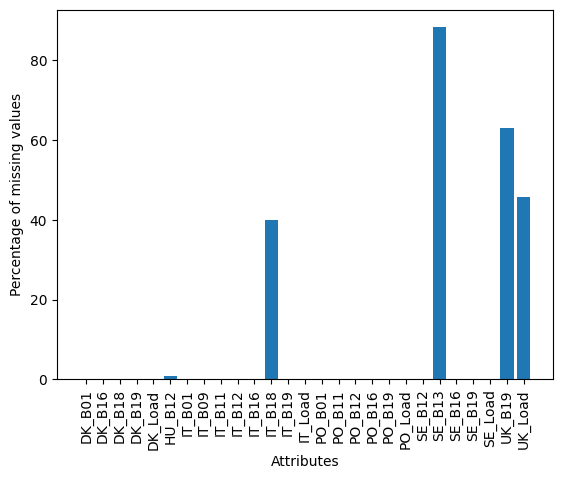

In [11]:
plt.bar(missings.index, 100*missings/df.shape[0])
plt.xlabel('Attributes')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation = 90);

# threshold = 40
# plt.axhline(threshold, color = 'r', linestyle = '--')

Given that we have `8761` rows, the variables that seem to pose more challenges are `UK_B19`, `SE_B13`, `IT_B18`, in the case of generated energies, and the variable `UK_Load`, in the case of loads.

Before deciding what to do with these variables, let's examine their contents.

In [12]:
critical_columns = missings_per_column[missings_per_column > 100].index
df[critical_columns].describe()

UK_B19  SE_B13       IT_B18      UK_Load
count  3234.000000  1030.0  5258.000000  4762.000000
mean   1598.923624     0.0    15.441613  3428.182486
std    1101.673890     0.0    26.079728   861.540102
min       0.000000     0.0     0.000000  1730.500000
25%     517.500000     0.0     0.000000  2659.625000
50%    1574.500000     0.0     4.000000  3428.250000
75%    2534.375000     0.0    16.500000  4076.250000
max    4132.000000     0.0   120.000000  5899.000000

One advantage of time series is that we can represent them over time and observe their evolution. This way, we can form a preliminary idea of the trend in the data and assess various methodologies to impute potential missing values.

In [13]:
def plot_evolution(df, column):
    """
    Shows the evolution of an specific column of a pandas dataframe.

    Parameters:
    - df: Pandas DataFrame
    - column: Name of the column for which to plot its evolution
    """
    # Ensure the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    fig = plt.figure(figsize=(10, 6))
    
    # Filter rows with non-null values in the current column
    df_filtered = df[['Date', 'Hour', column]].dropna()

    # Plot the points with filled circles and connect them with thin lines
    _ = plt.plot(df_filtered['Date'] + pd.to_timedelta(df_filtered['Hour'], unit='h'), df_filtered[column],
             marker='o', linestyle='-', markersize=2, linewidth=0.8, label=column)

    # Customize the appearance of the plot
    _ = plt.title(f'Evolution in time of column {column}')
    _ = plt.xlabel('Date and Hour')
    _ = plt.ylabel(column)
    _ = plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    fig.axes[0].set_xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
    
    # Show the plot
    plt.show()

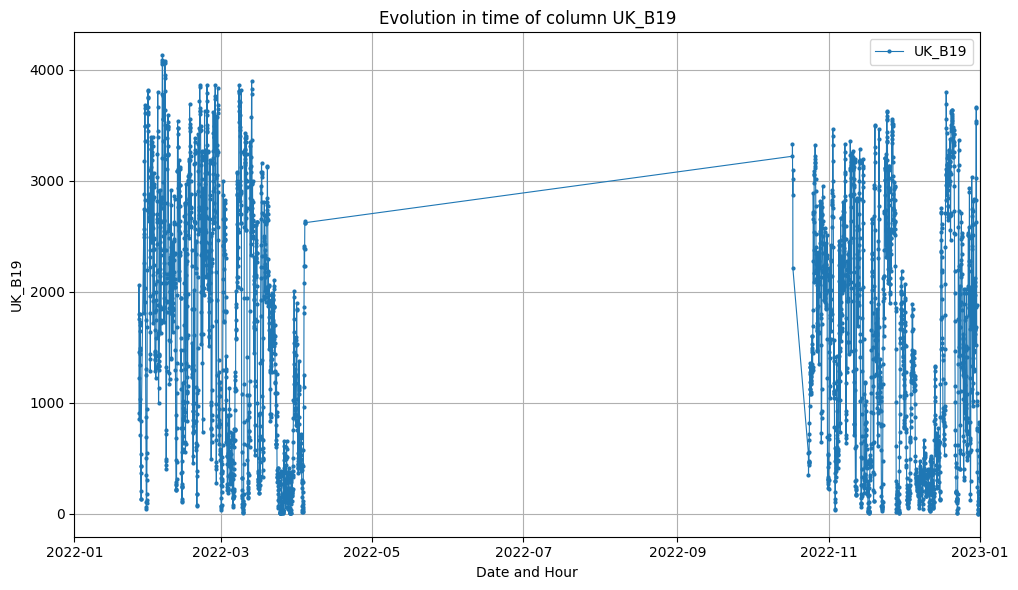

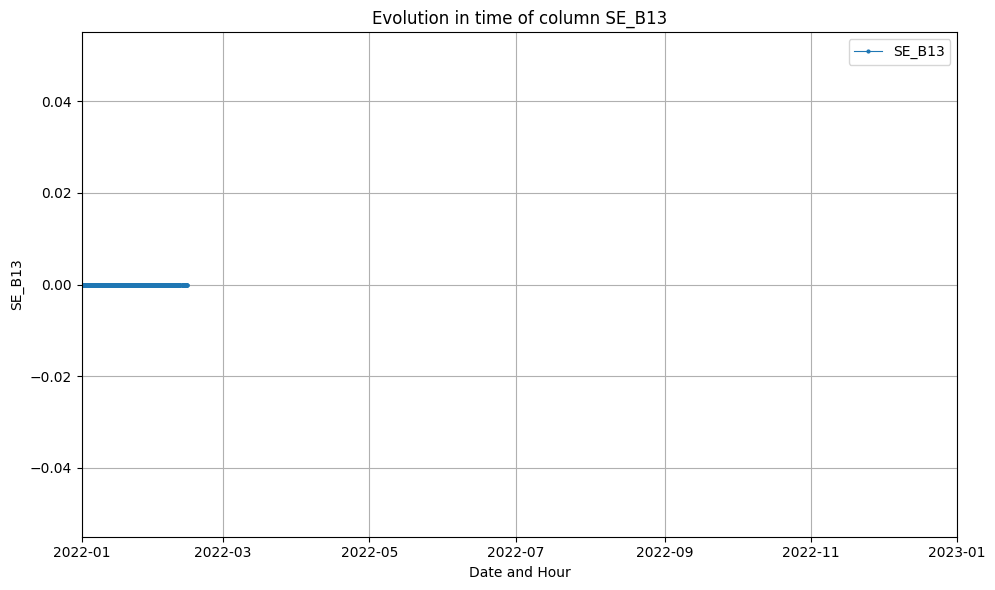

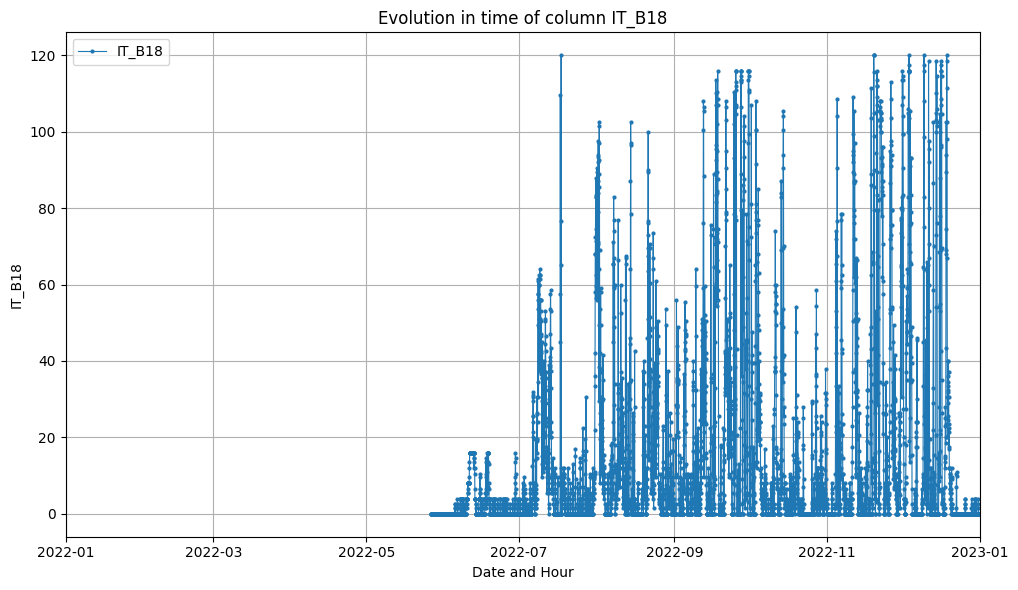

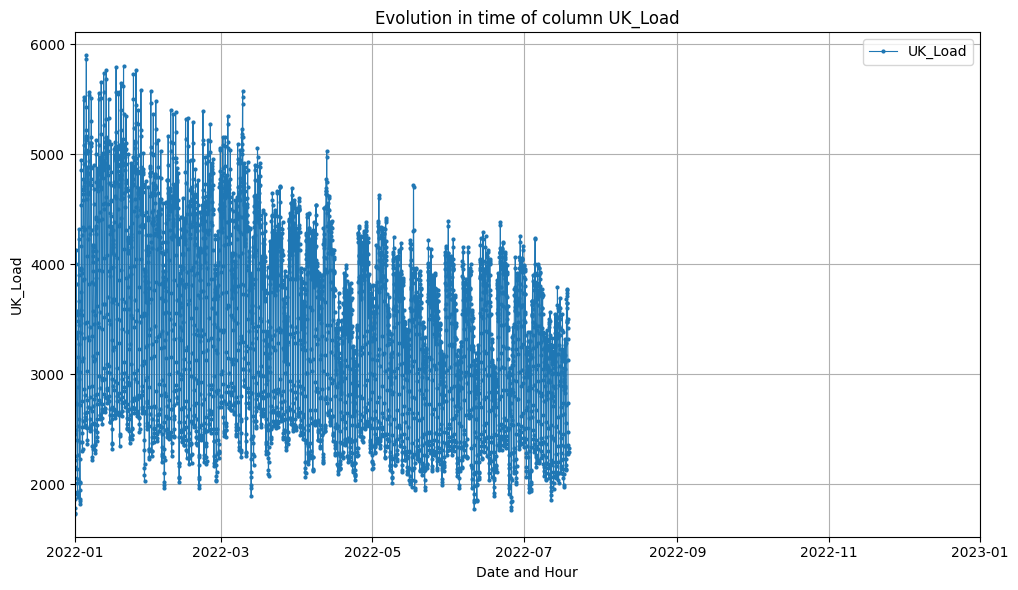

In [14]:
# Iterate over the critical columns and create a figure for each one
for column in critical_columns:
    plot_evolution(df, column)

We can see that it's challenging to discern the data trend due to significant variability from one timestamp to another. Therefore, we will recalculate the value of each point as the average of the previous `n` values and display the graphs again.

In [15]:
def compute_rolling_mean(df, column, window_size):
    return df[column].rolling(window = window_size, min_periods = 1).mean()

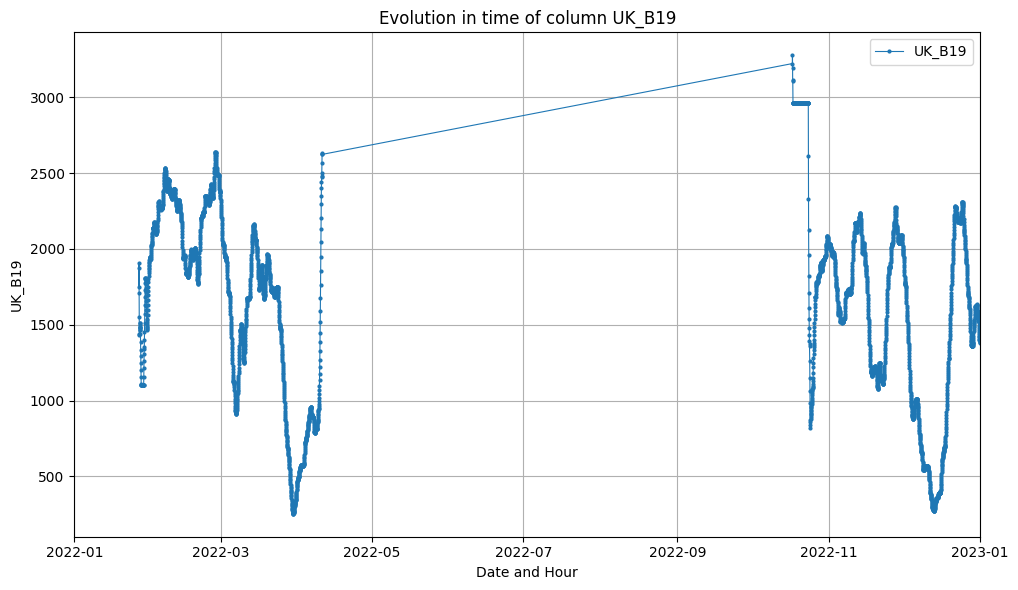

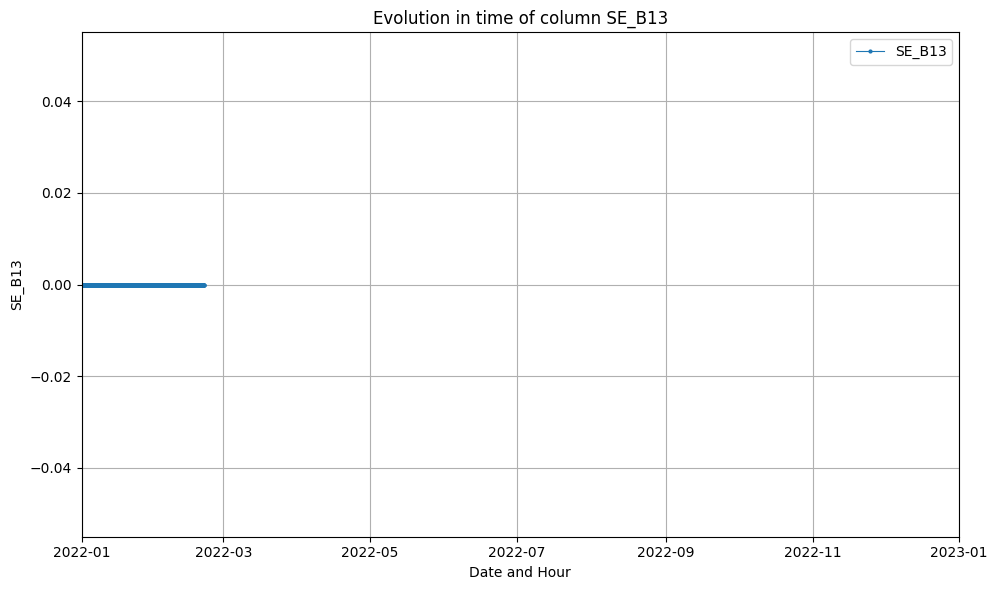

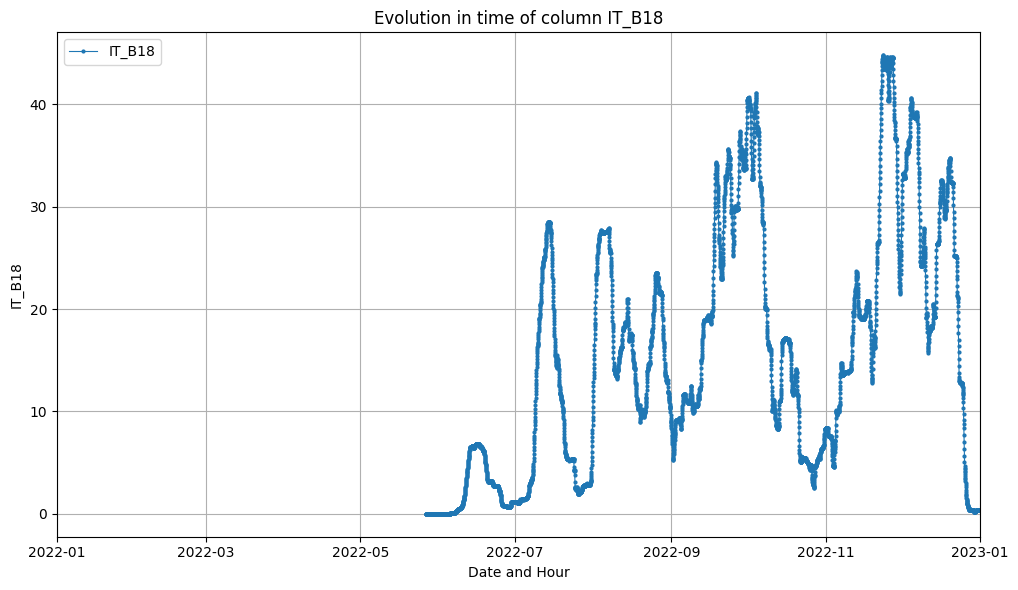

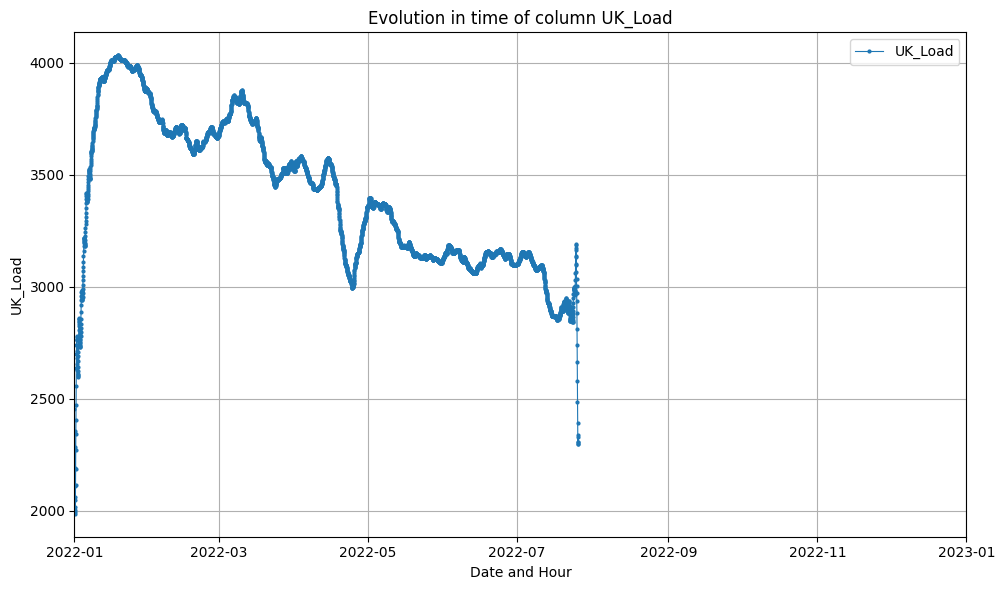

In [16]:
# Creating a copy of the original dataframe
df_copy = df[['Date', 'Hour'] + critical_columns.to_list()].copy()

# Computing the rolling mean of each critical column with a window size of 5
for column in critical_columns:
    df_copy[column] = compute_rolling_mean(df_copy, column, window_size = 168)
    plot_evolution(df_copy, column)

Now, we will carry out a basic inspection of the data and check the types of variables we have, as well as the basic form and structure they exhibit.

From the previous graphs, we can draw some conclusions:

1. Firstly, visualizing each value as the average of previous measures provides much smoother metrics, allowing us to better infer the data trend over time.
2. Regarding `UK_B19`: A slight upward trend can be inferred. However, it is challenging to interpret if the data follows a specific distribution. One possibility for imputing missing values could be linear interpolation or even polynomial interpolation.
3. Regarding `SE_B13`: In this case, there is not much to comment on. We can see that the variable encodes information about Marine energy generated at the beginning of the year until a little before March. Therefore, we assume that this type of energy is 0 for the rest of the year.
4. Regarding `IT_B18`: Similar to `UK_B19`, the data suggests that onshore wind energy generation has an upward trend from around June. There are numerous dates, however, where the generation of this type of energy is 0. Before June, the generation also seems to be consistently zero. Additionally, during the months when this type of energy is generated, we observe increasingly higher peaks at certain moments (possibly due to specific cyclic natural phenomena that are on the rise).
5. Regarding `UK_Load`: We see that it starts the year with values on an upward trend. Then, gradually (and with a lot of variability in the original data graph), the load decreases until the end of July, where the load values drop drastically.

**General comment:** To evaluate whether all these forms of energy generation indeed follow the observed distributions and trends, it would be ideal to consider data from other years. However, due to project time constraints and for simplicity, we will continue working only with the 2022 data and carry out the mentioned imputations.

It seems reasonable to consider performing imputation of missing values using regression models or more complex interpolations, such as polynomial interpolation. However, we believe that linear interpolation could be suitable in this case, and that's what we will use.

In [17]:
# We interpolate the missing values using Linear interpolation
df.interpolate(method='linear', limit_direction='both', inplace=True)

In [18]:
# Computiung again how many missing values do we have for each variable
missings_per_column = df.isna().sum()
# Only showing the ones that have missing values
missings_per_column[missings_per_column > 0]

Series([], dtype: int64)

We can see that we have imputed all existing missing values. Now, however, we are interested in examining how the distribution of the columns we previously referred to as critical has turned out.

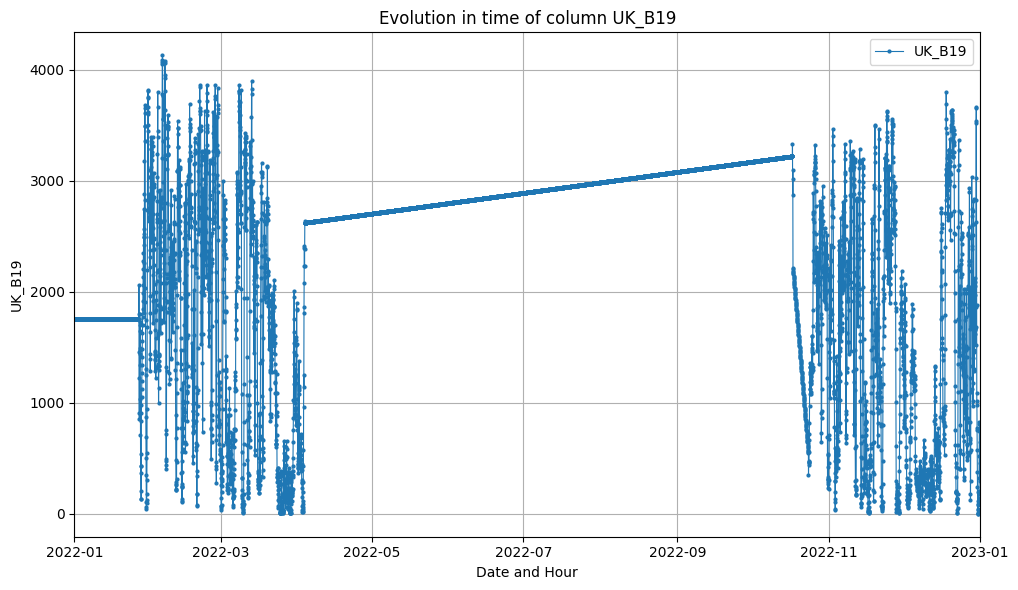

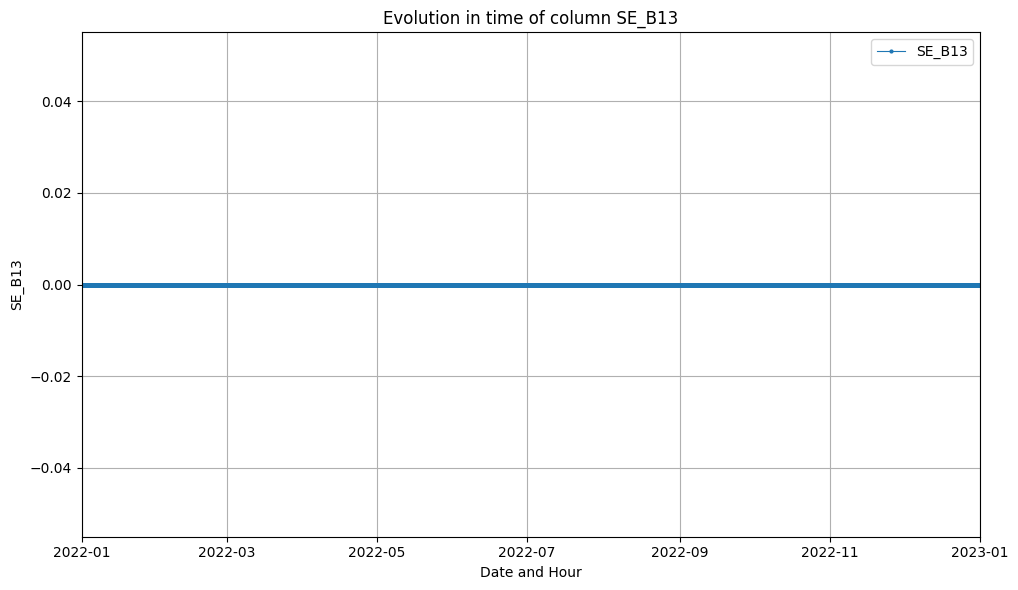

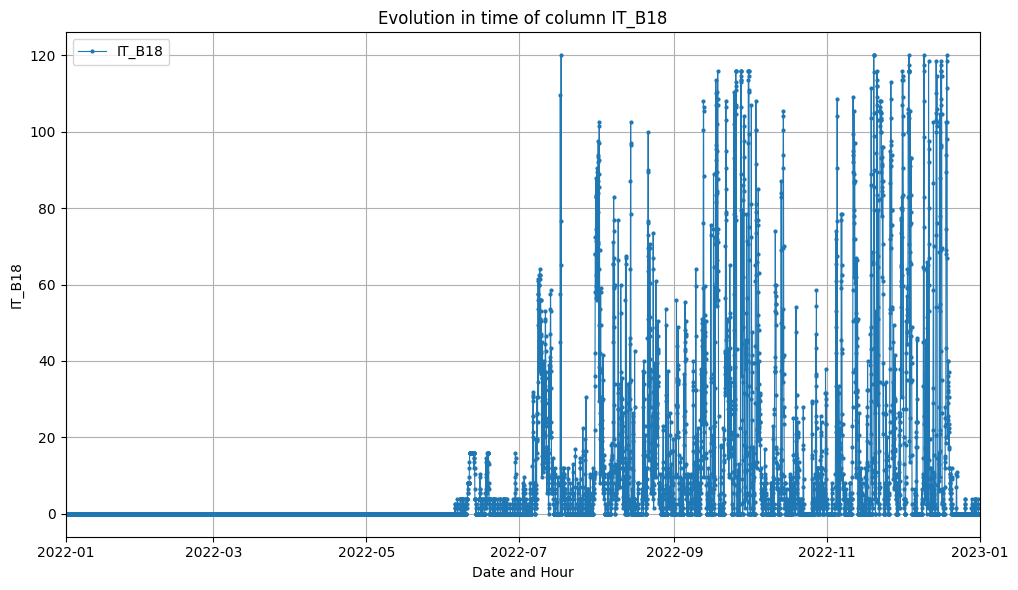

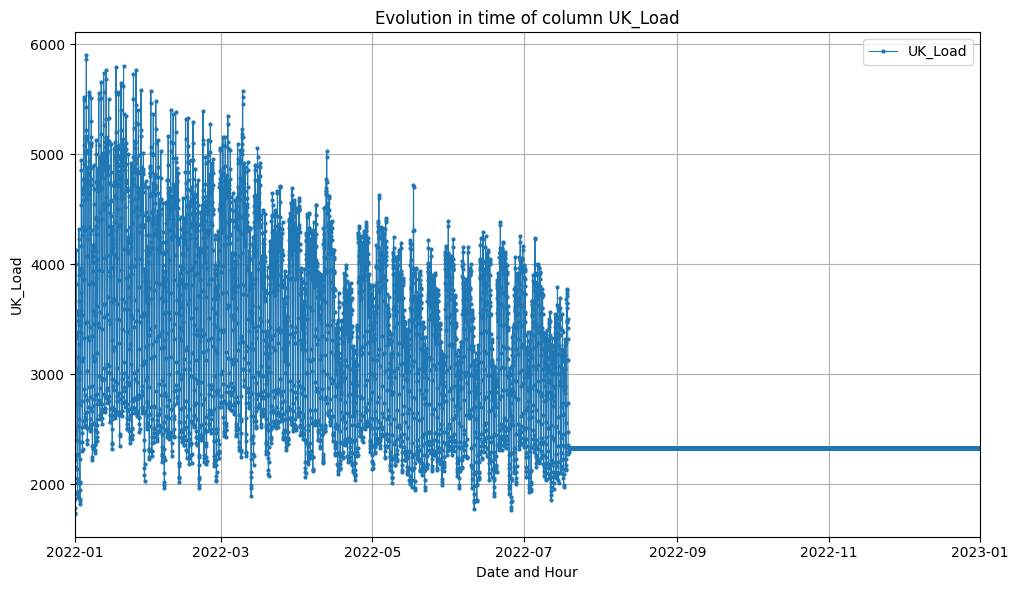

In [19]:
# Iterate over the critical columns and create a figure for each one
for column in critical_columns:
    plot_evolution(df, column)

**[FALTA COMENTARI DEL RESULTAT DE LA IMPUTACIÓ]**

## Outliers

We will check for outliers at this point, variable by variable, as we believe that if we group the subtypes of energy into a single variable `green_energy` for each country, we might lose samples that could represent outliers.

In [20]:
def plot_month_outliers(df, column):
    """
    Shows the boxplots of some dataframe column grouped by month and its evolution

    Parameters:
    - df: Pandas DataFrame
    - column: Name of the column for which to plot its boxplots and evolution
    """
    # Checking assumptions
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    elif 'Month' not in df.columns: 
        raise ValueError("Column 'Month' not found in the DataFrame.")
    
    # -------------------------- Creating two subfigures ------------------------- #
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
    
    # Variable to store the months of the year
    months = pd.date_range(start = "2022-01-01", end = "2022-12-31", freq = "MS")
    
    # ------------------- Showing the evolution of the variable ------------------ #
    # Plot the points with filled circles and connect them with thin lines
    axes[0].plot(df['Date'] + pd.to_timedelta(df['Hour'], unit='h'), df[column],
                     marker = 'o', linestyle = '-', markersize = 1, linewidth = 0.8, 
                     label = column)

    # Customize the appearance of the plot
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel(column)
    axes[0].legend()
    axes[0].grid(True)
    axes[0].xaxis.set_ticks(months)
    axes[0].set_xticklabels([date.month for date in months])
    axes[0].set_xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
    
    # Showing vertical lines delimiting months in the evolution figure
    for month_date in months: 
        axes[0].axvline(x = month_date, color = 'red', linestyle = '--', 
                        linewidth = 1)
    
    # --------------------- Showing boxplots grouped by month -------------------- #
    sns.boxplot(x = 'Month', y = column, data = df)
    

/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59720/789784597.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))


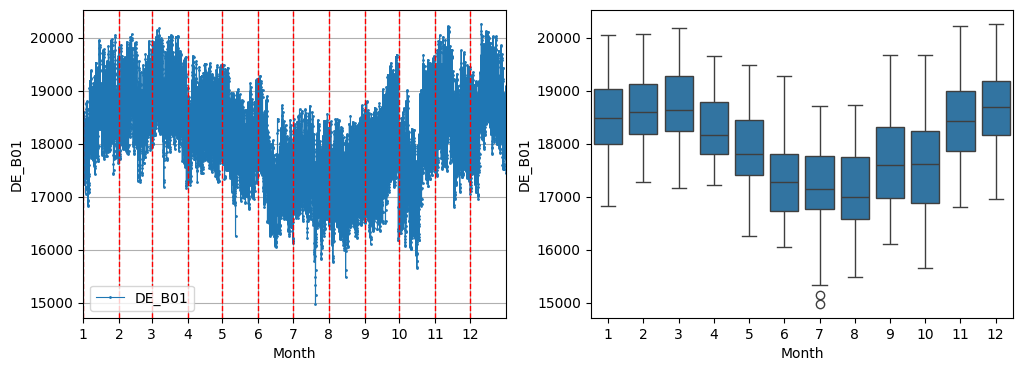

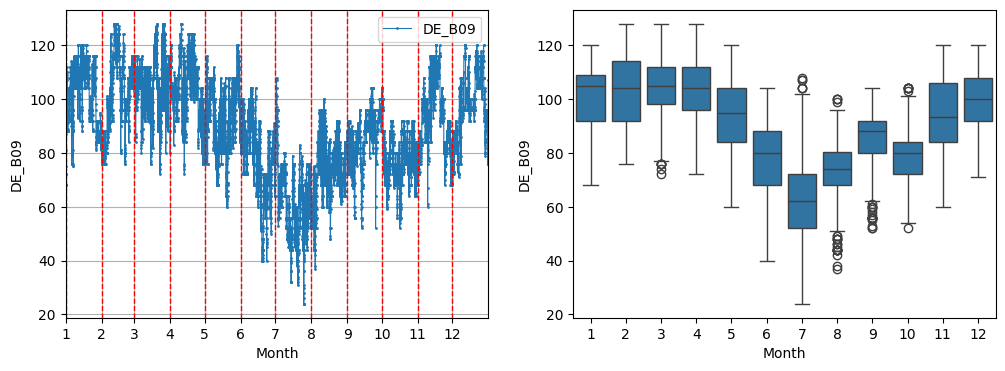

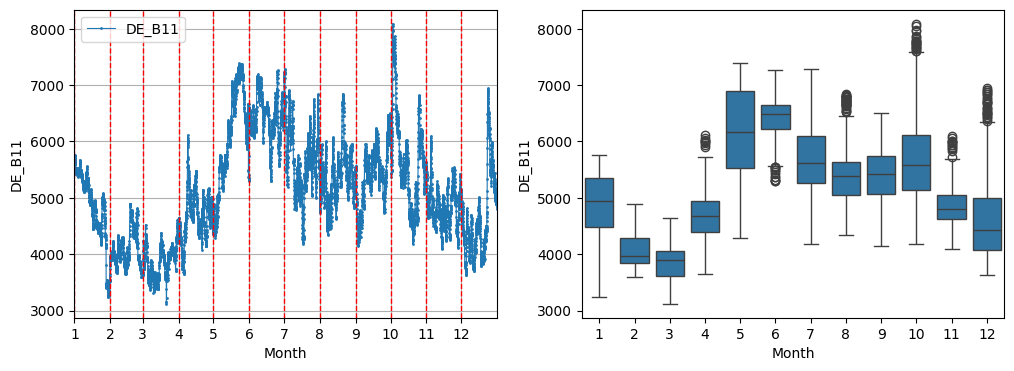

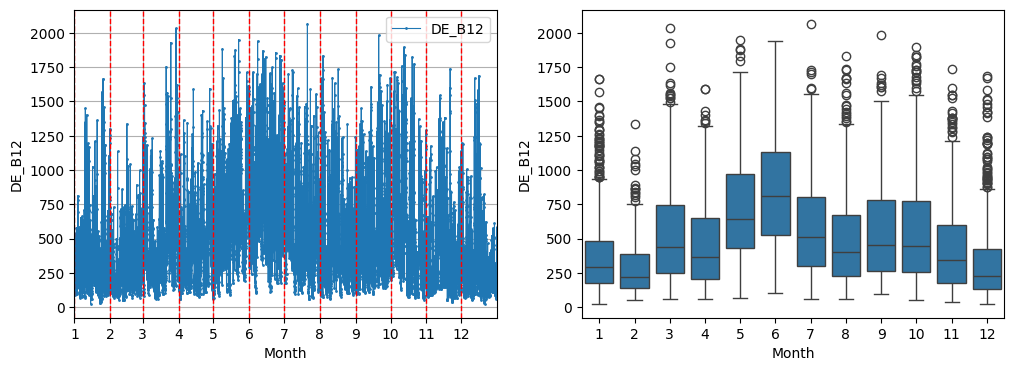

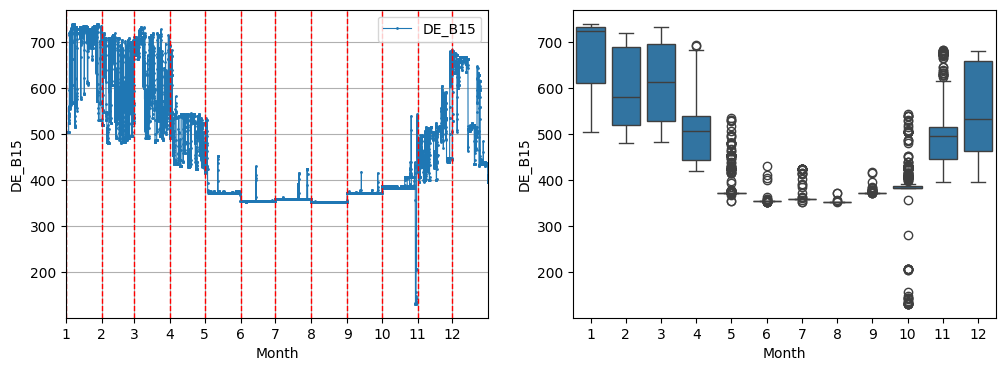

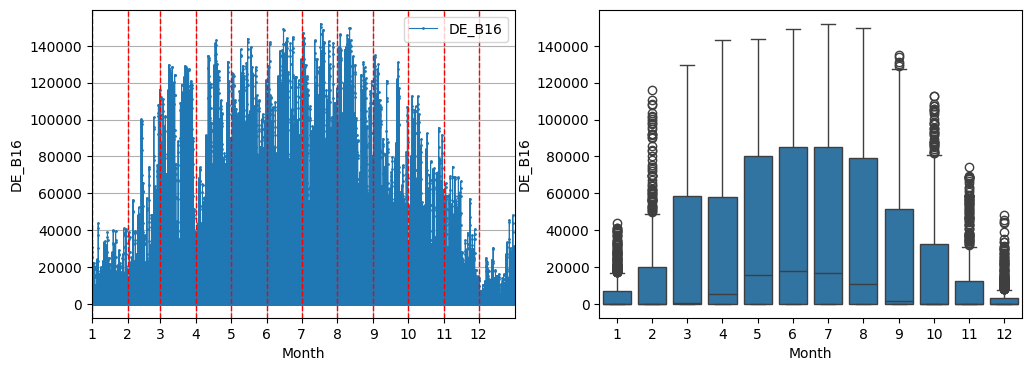

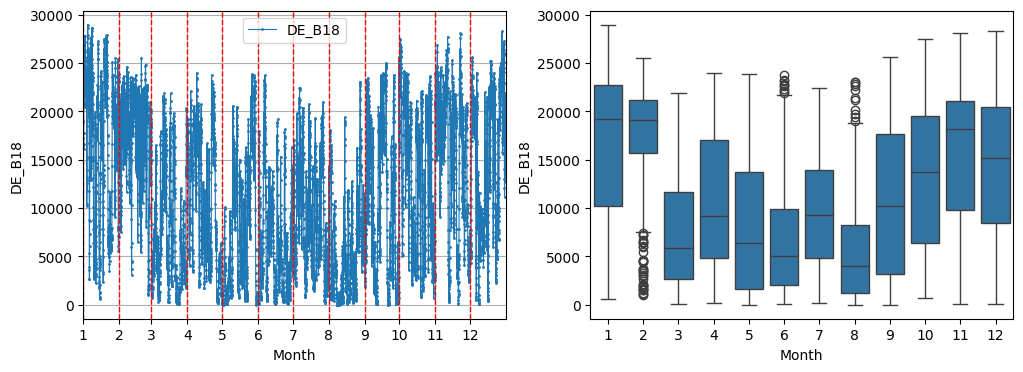

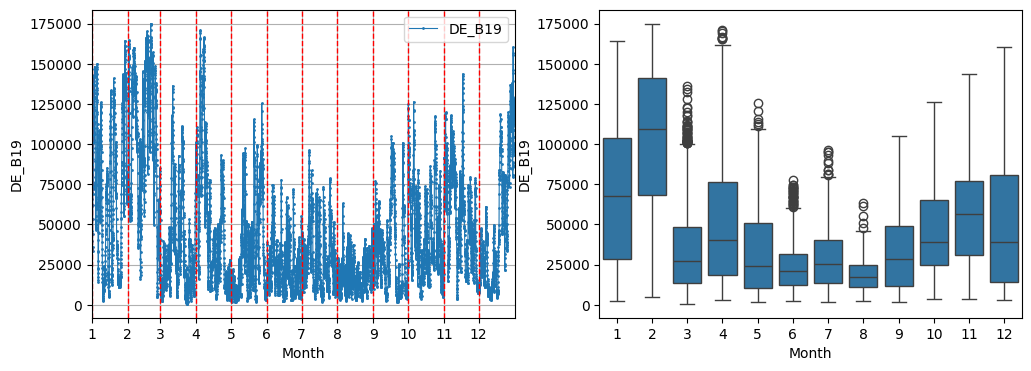

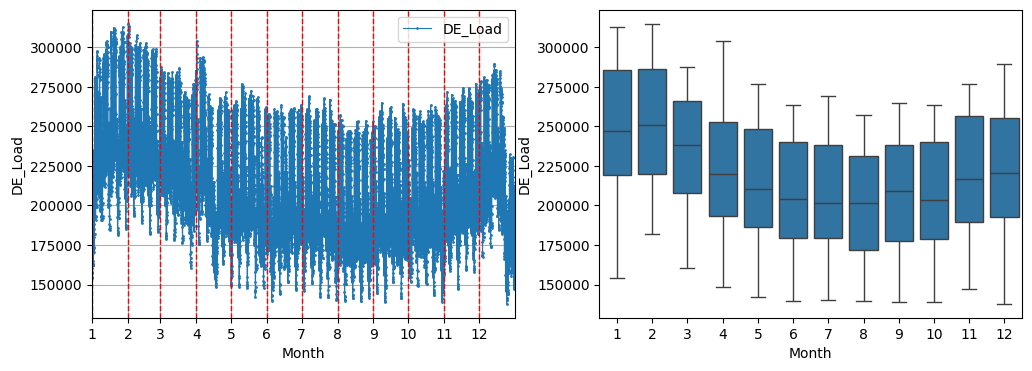

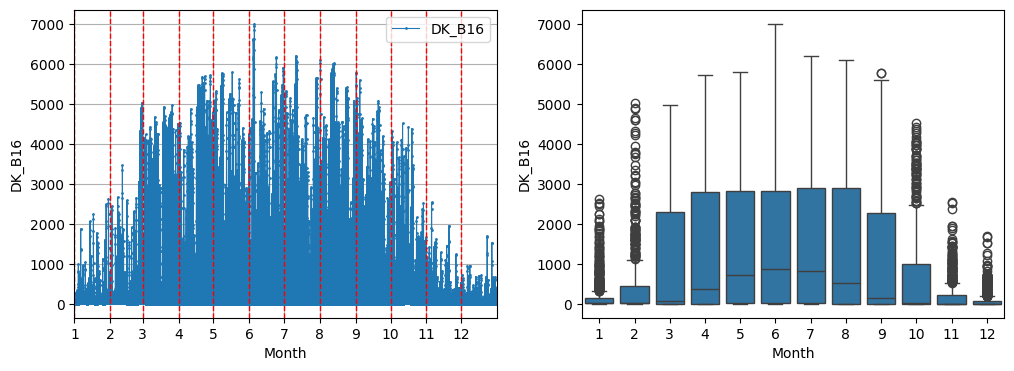

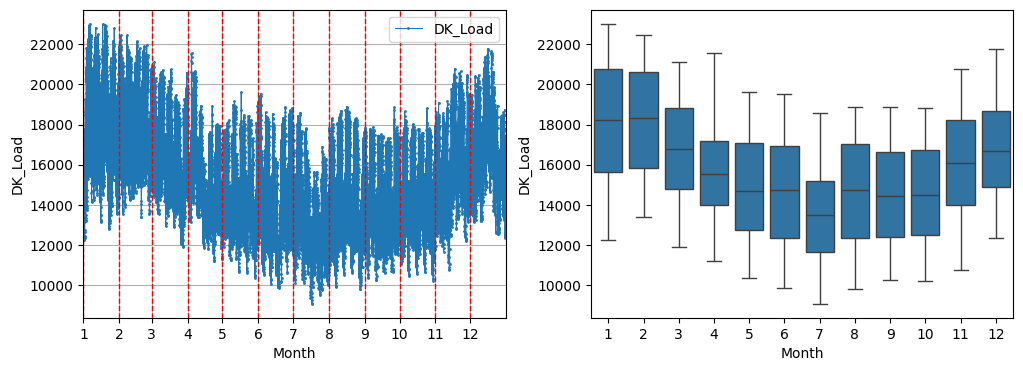

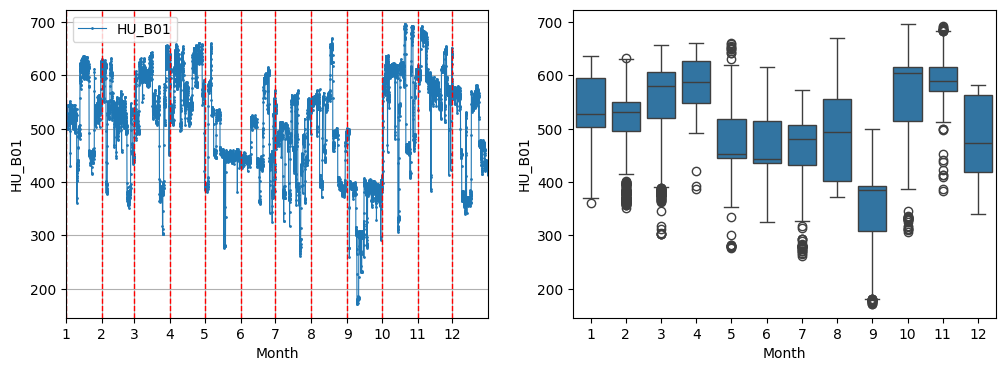

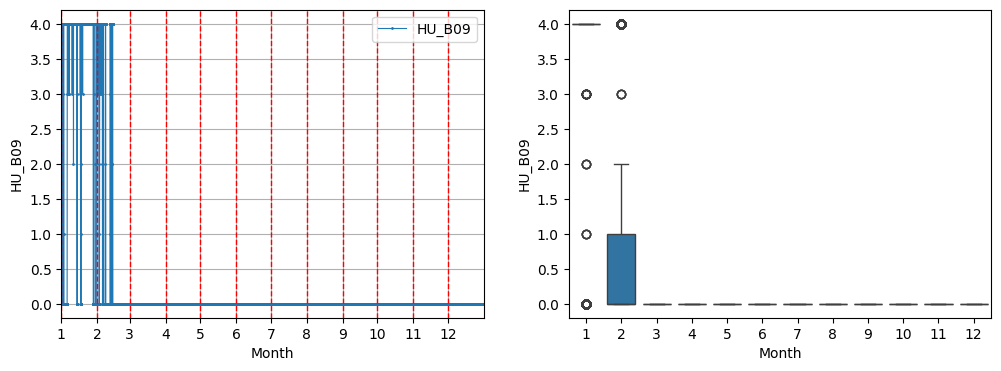

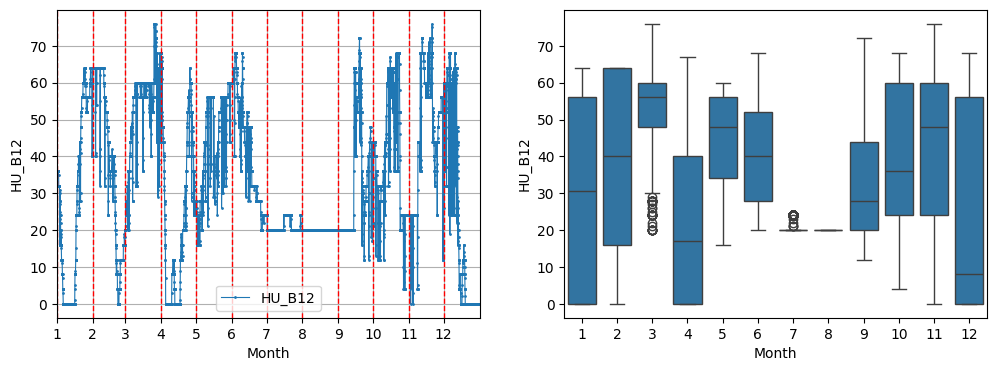

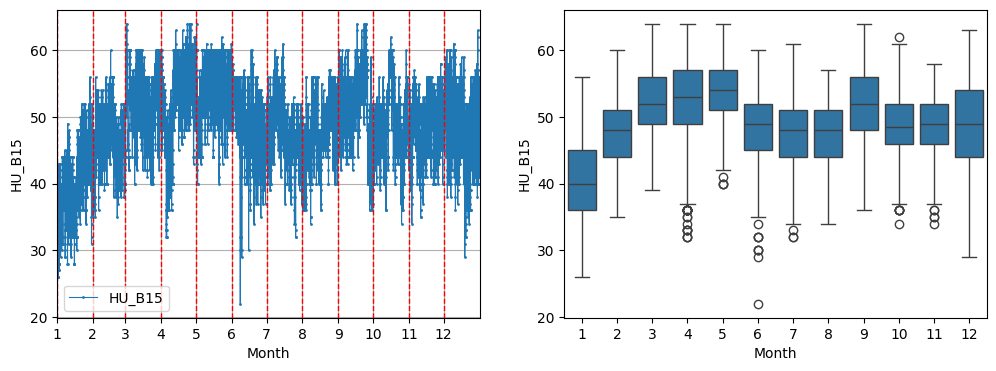

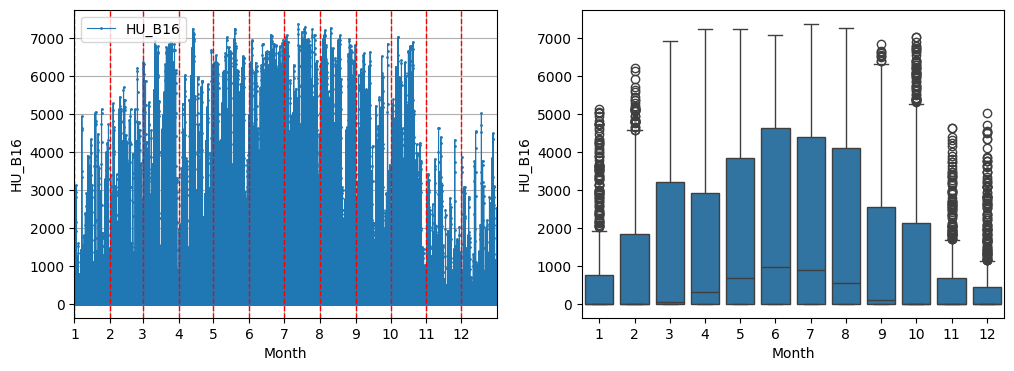

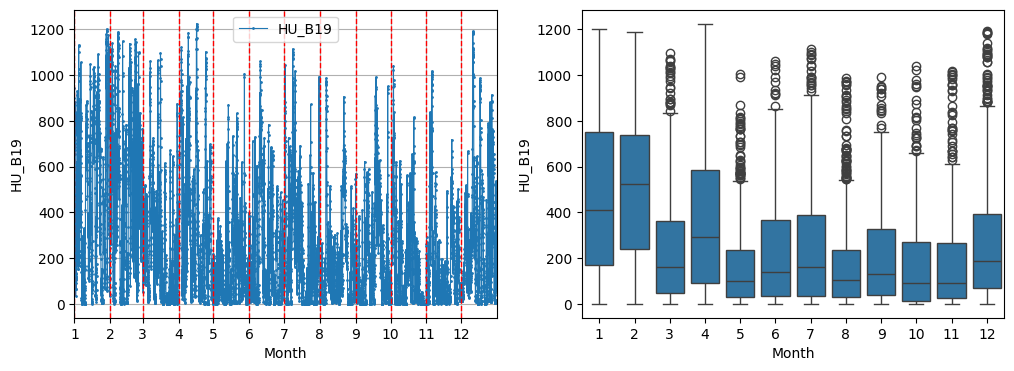

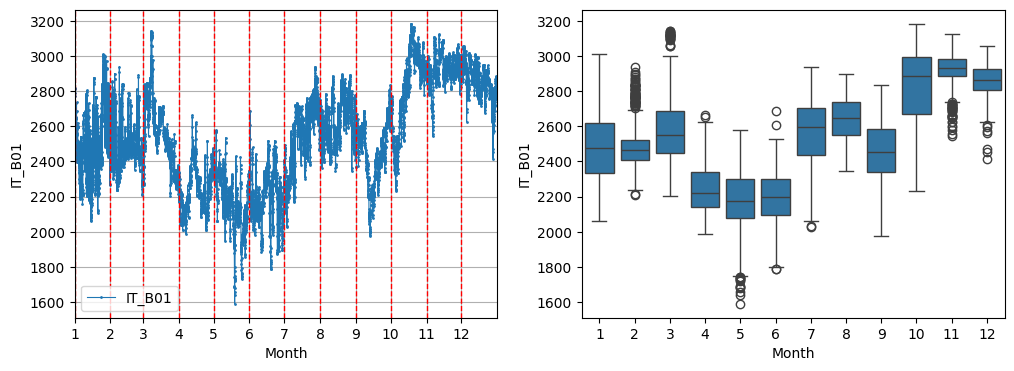

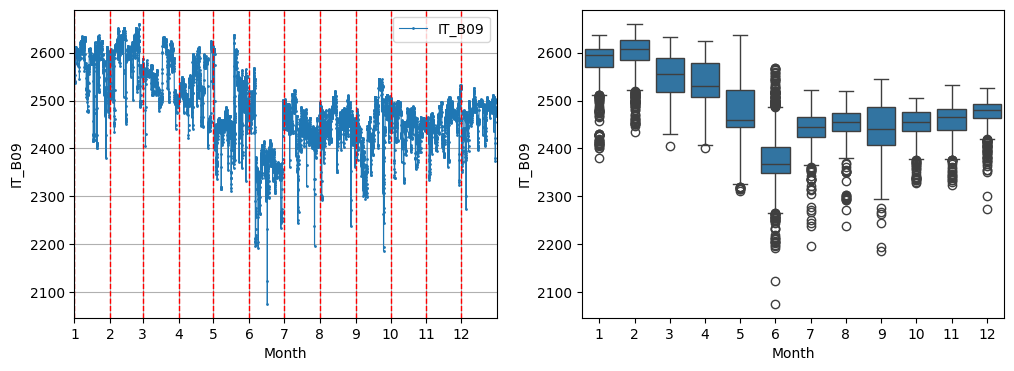

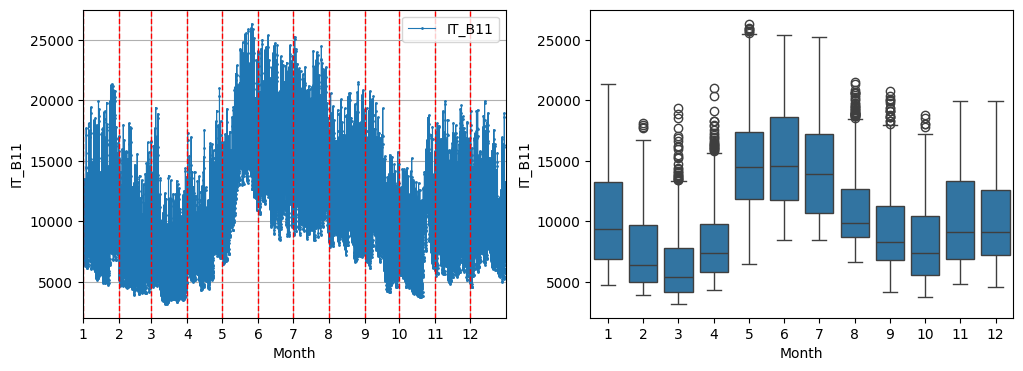

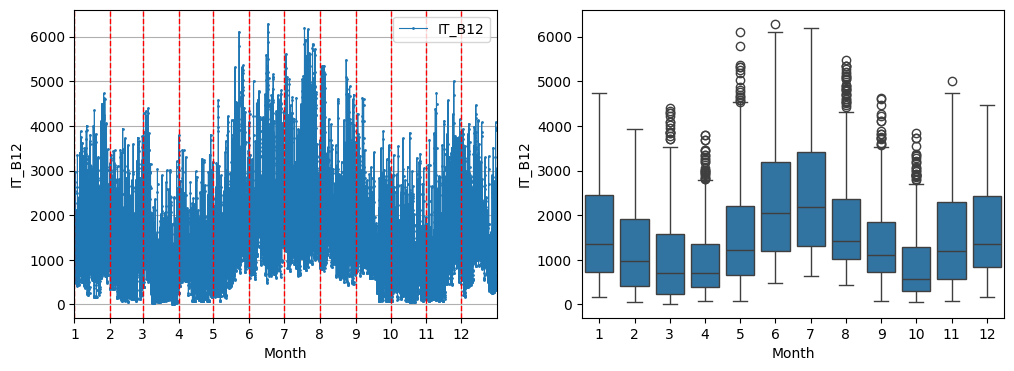

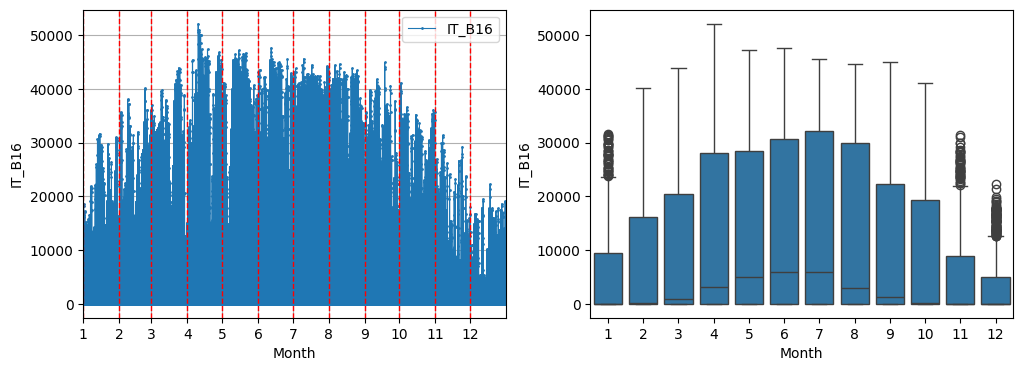

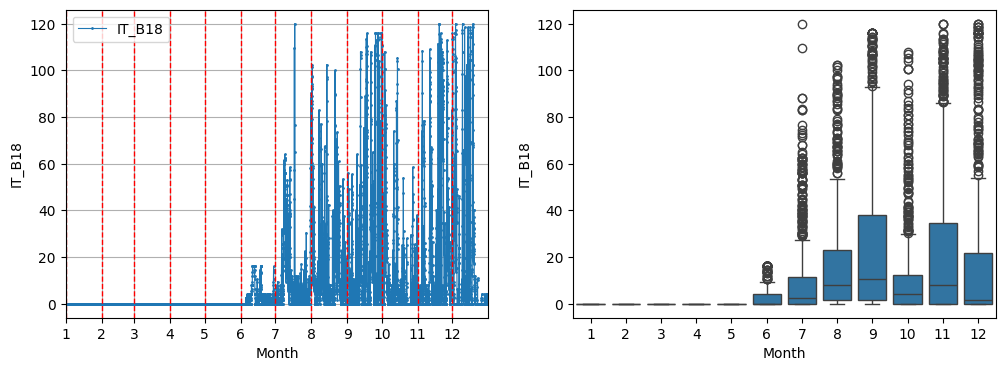

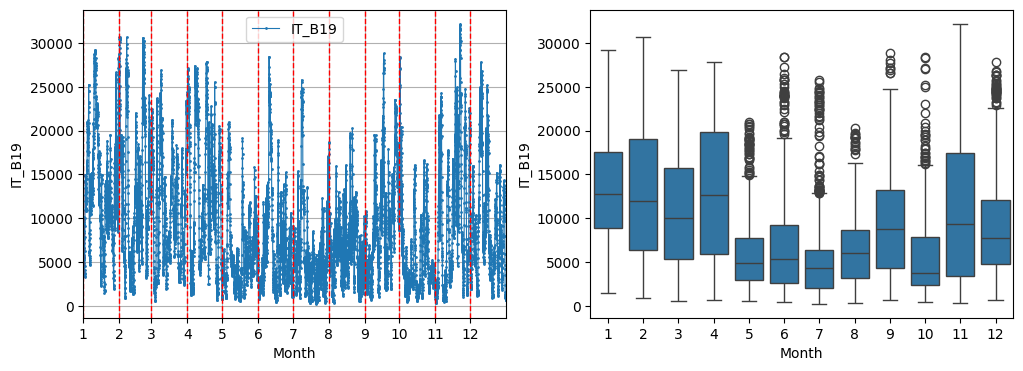

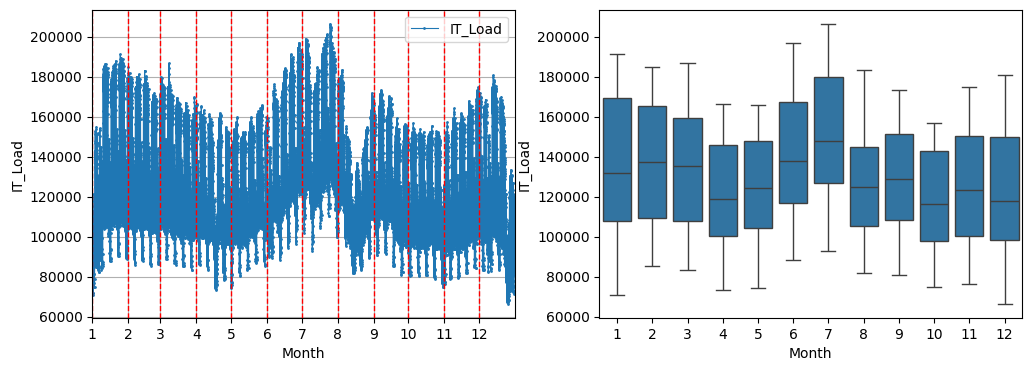

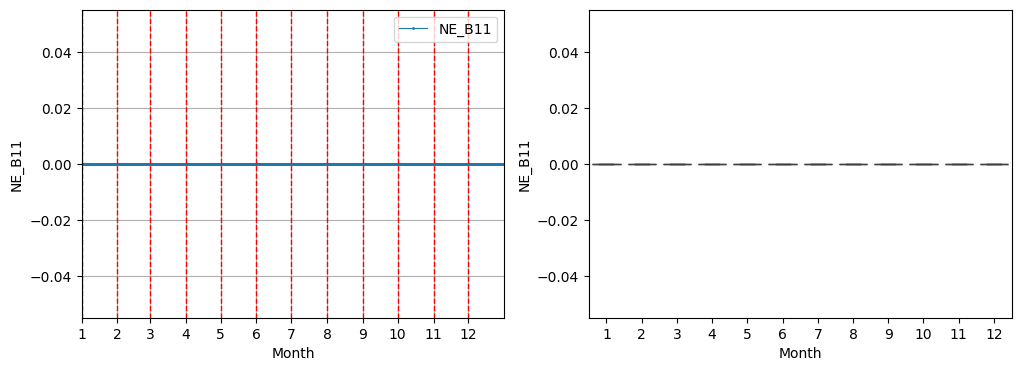

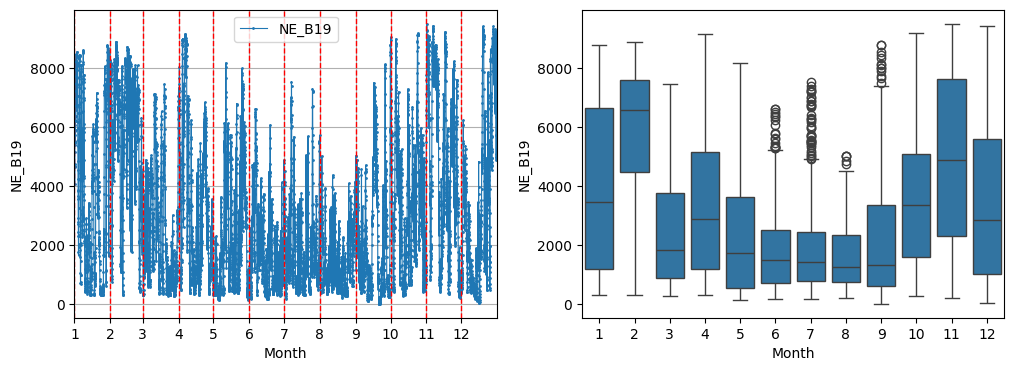

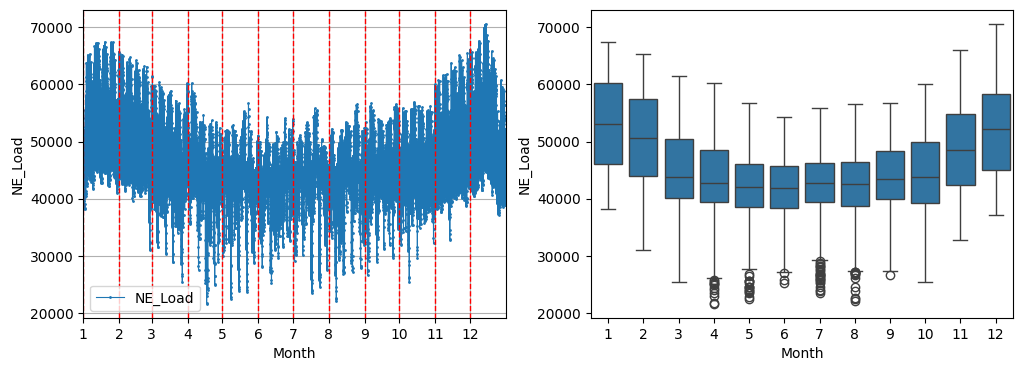

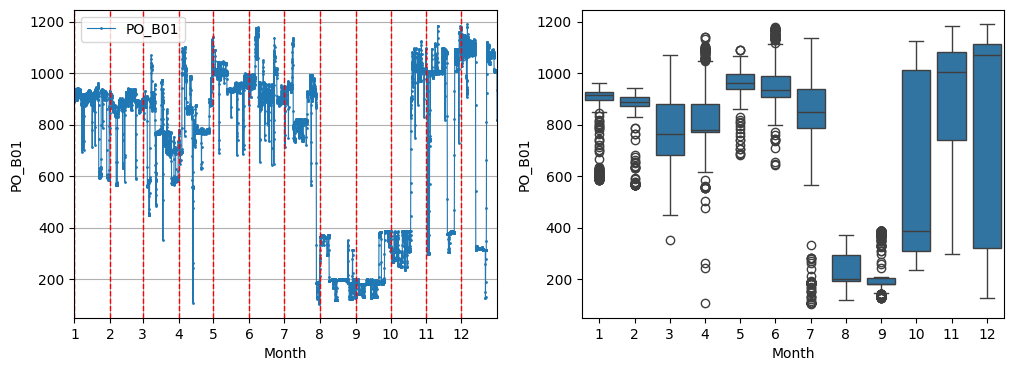

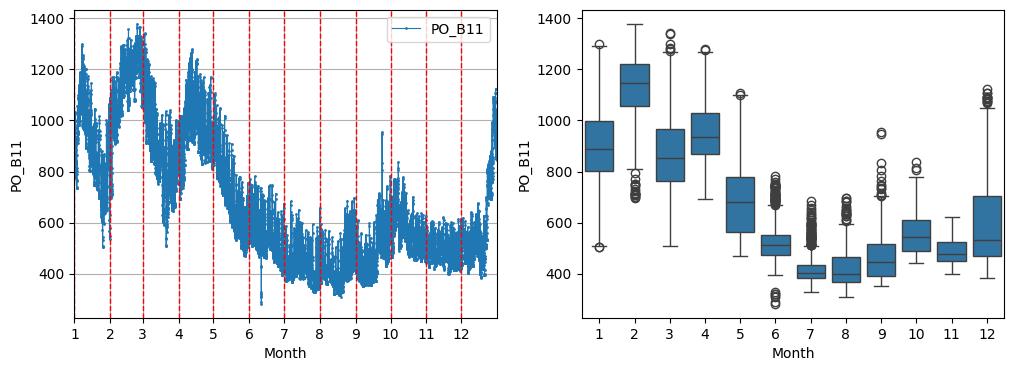

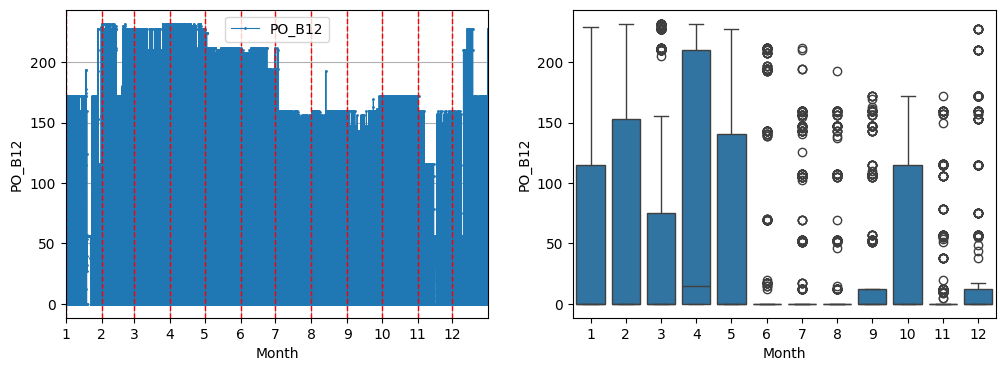

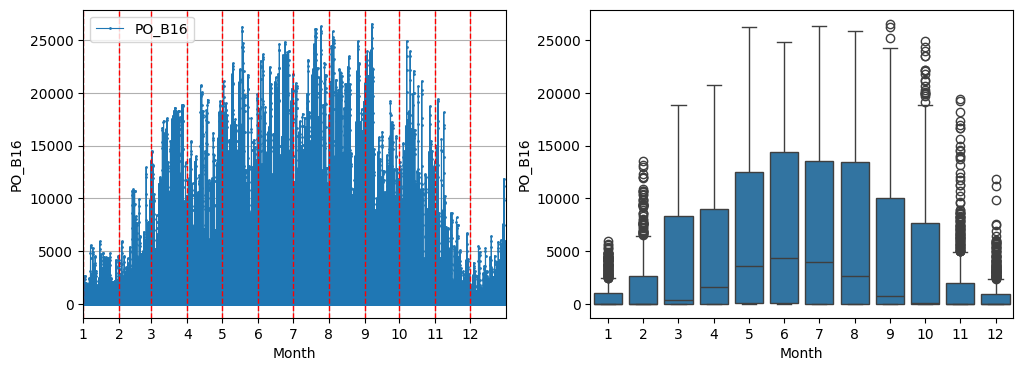

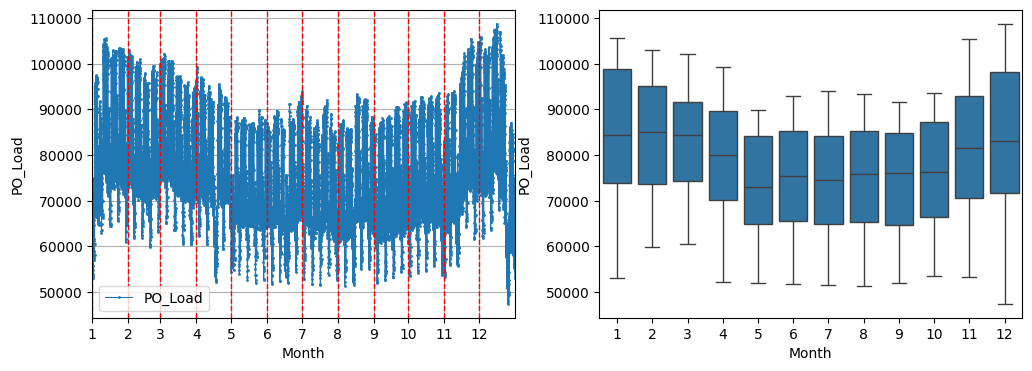

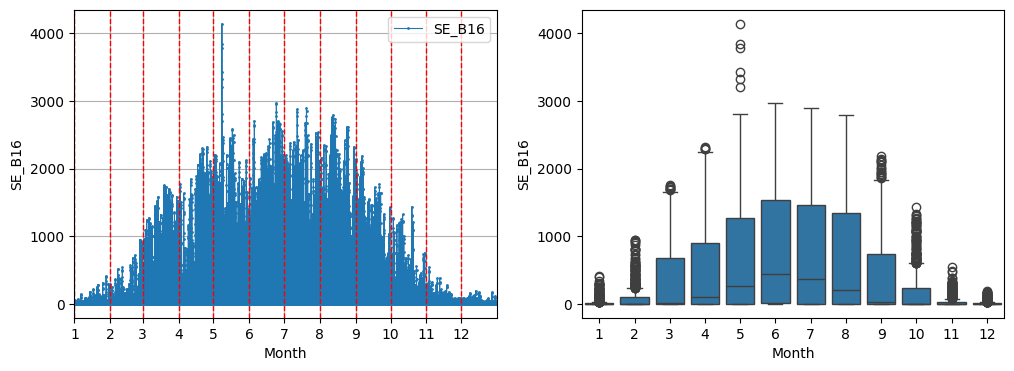

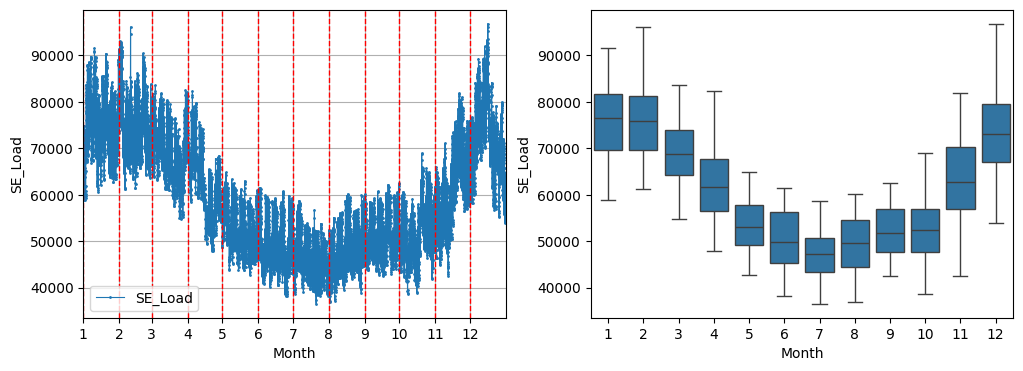

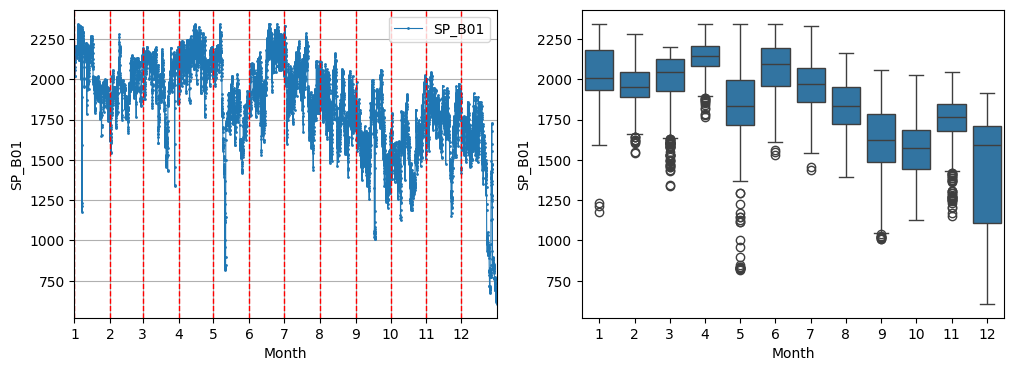

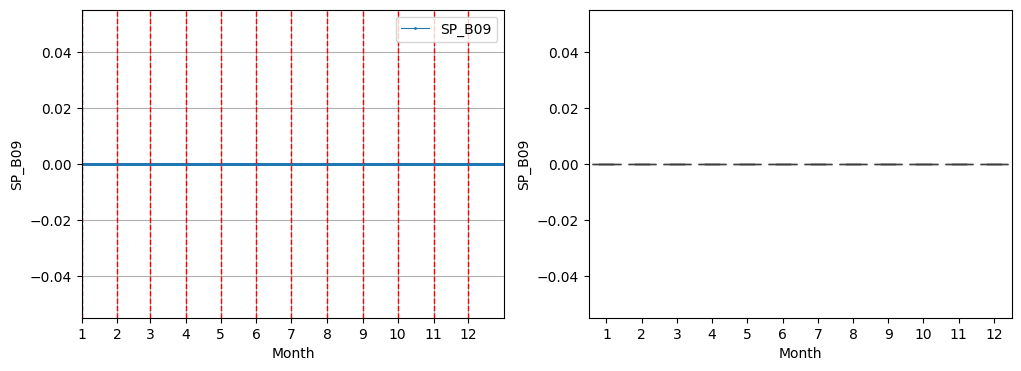

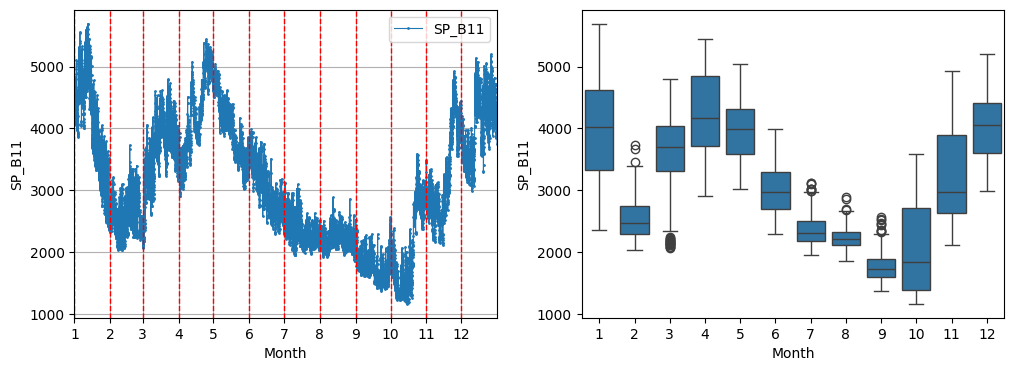

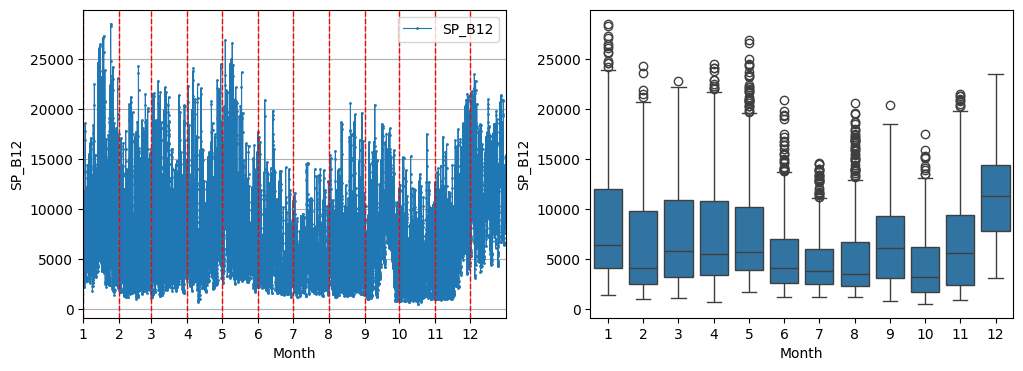

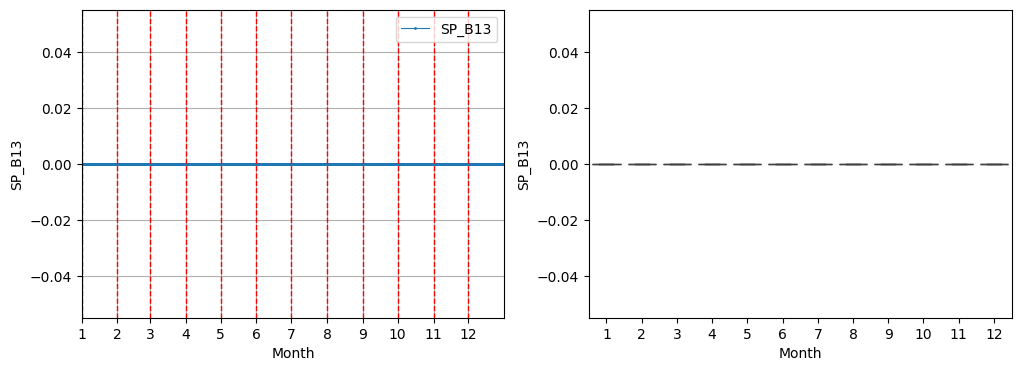

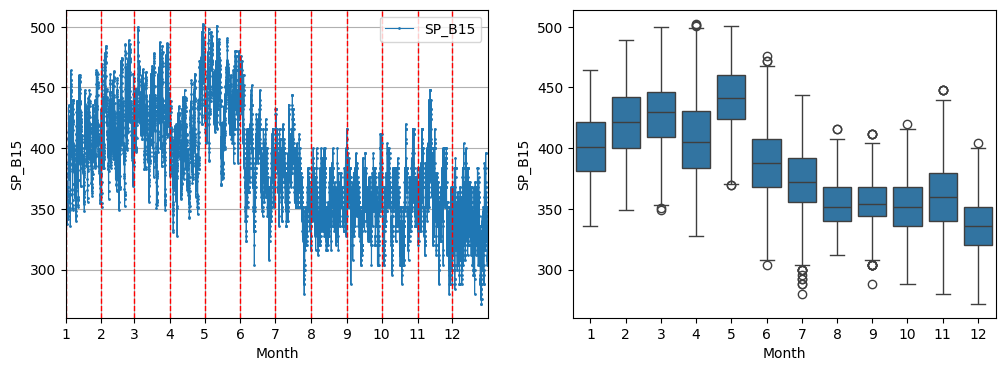

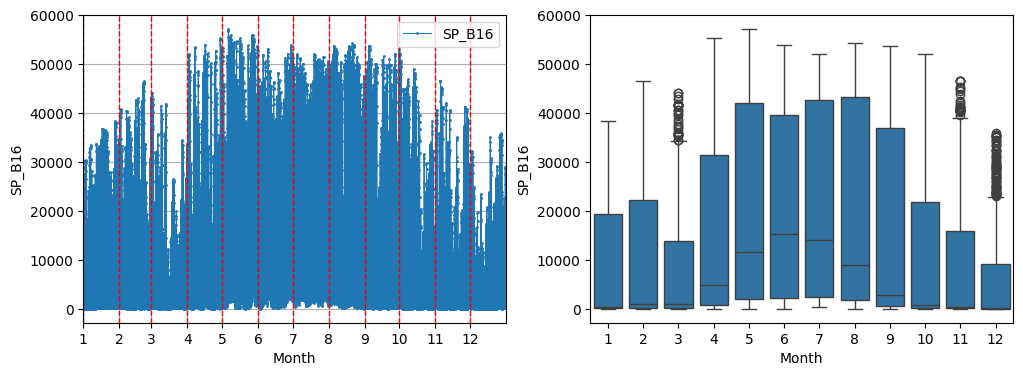

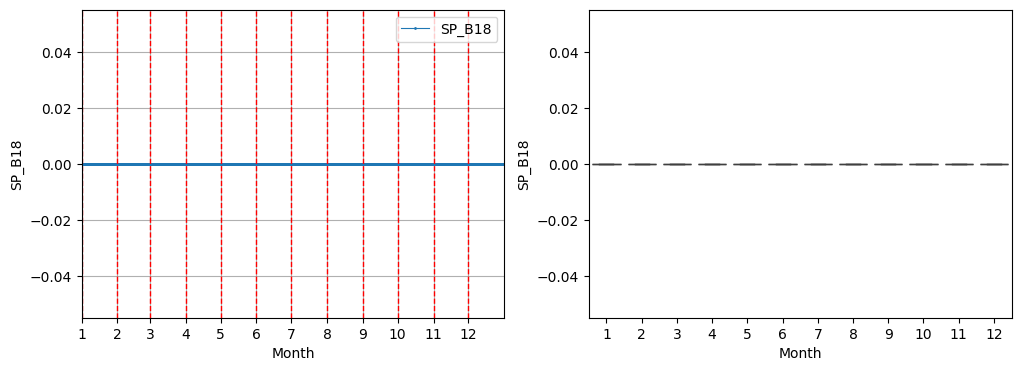

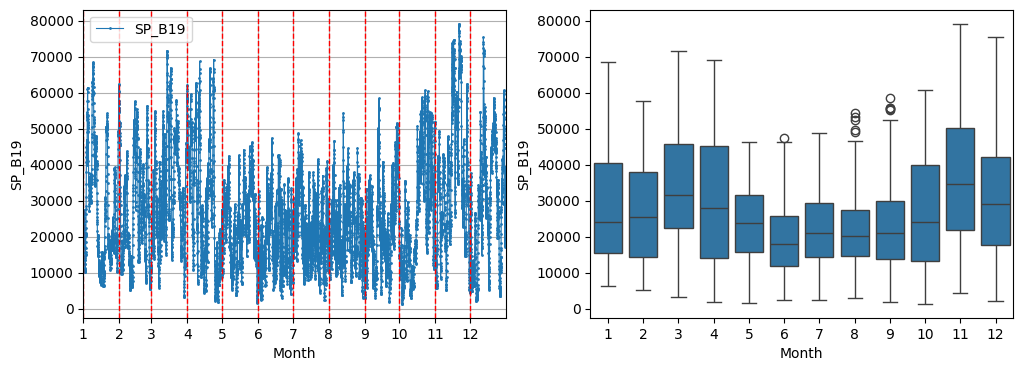

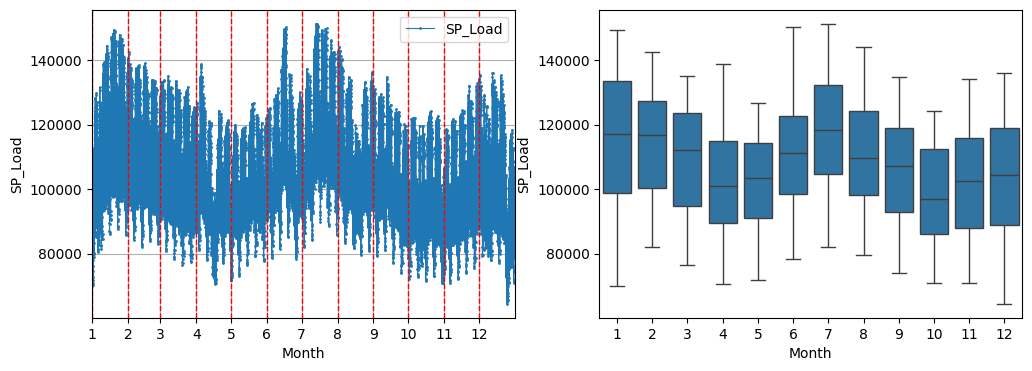

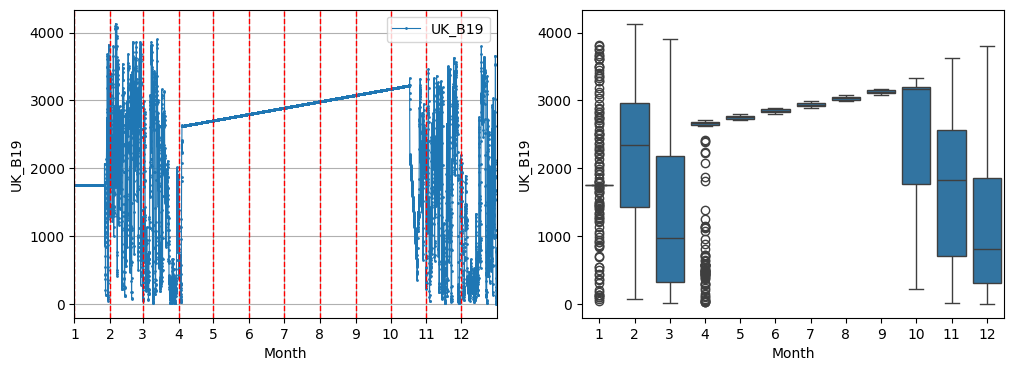

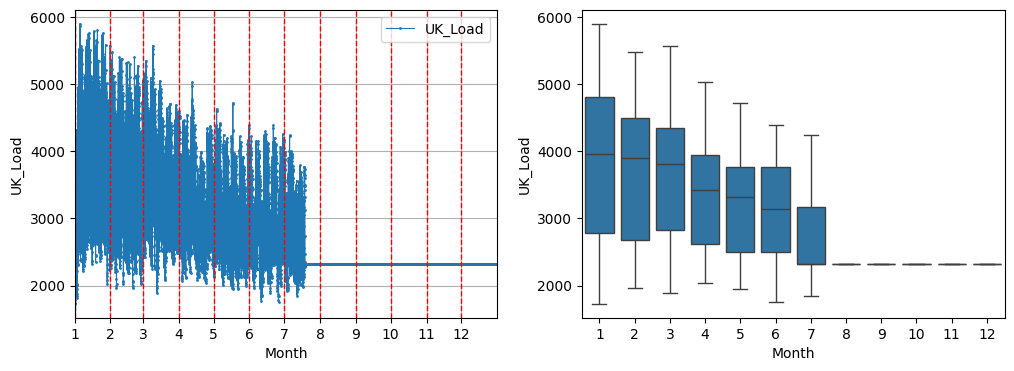

In [21]:
# Creating new auxiliary feature with the desired granularity
df['Month'] = df.Date.dt.month

columns = [ column for column in df.columns if '_' in column ]
columns = sorted(columns, key = lambda elem: elem.split('_'))
for column in columns:
    plot_month_outliers(df, column)